### An exploritory examination of 3D convo modeling with Keras on brain data
***

#### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib as plt
import seaborn as sns

In [2]:
data = pd.read_excel("./Inputs/IXI.xls")

#### EDA & Cleaning (Non Images)

In [3]:
data.isnull().sum()[data.isnull().sum()>0]

DOB            3
STUDY_DATE    26
AGE           29
dtype: int64

**We may be able to impute some of those ages. If we have their DOB & and we can make an informed guess for STUDY_DATE, we might be able to guess their age ~+/- 1year**
***

In [4]:
impute_m = pd.to_datetime(data[data.STUDY_DATE.notnull()].STUDY_DATE)

In [5]:
impute_m.groupby([impute_m.dt.year,impute_m.dt.month]).count()

STUDY_DATE  STUDY_DATE
2005        6             17
            7             25
            8             51
            9             29
            10            38
            11            24
            12            17
2006        1             18
            2             39
            3             25
            4             31
            5             21
            6             23
            7             45
            8             61
            9             44
            10            33
            11            45
            12             7
Name: STUDY_DATE, dtype: int64

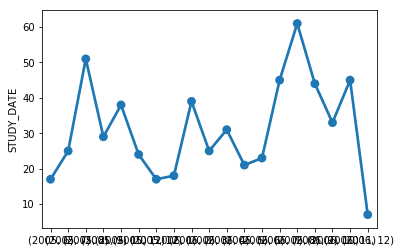

In [6]:
ax = sns.pointplot(impute_m.groupby([impute_m.dt.year,impute_m.dt.month]).count().index,impute_m.groupby([impute_m.dt.year,impute_m.dt.month]).count())

** August 8th 2006 is when most of the scans were preformed, so we can use that to fill our STUDY_DATE nulls**

In [7]:
for i in data[data.STUDY_DATE.isnull()].index:
    data.at[i,'STUDY_DATE'] = '2006-8-18'

In [8]:
data.isnull().sum()[data.isnull().sum()>0]

DOB     3
AGE    29
dtype: int64

In [9]:
data.DOB = pd.to_datetime(data.DOB)

In [10]:
for i in data[data.AGE.isnull()].index:
    data.at[i,'AGE'] = (data.at[i,'STUDY_DATE'] - data.at[i,'DOB']).days/365

In [11]:
data.isnull().sum()[data.isnull().sum()>0]

DOB    3
AGE    3
dtype: int64

**We have 20+ more usable values, we can drop the remaining 3**

In [12]:
data = data.dropna()

#### EDA & Cleaning (Images)

In [13]:
import numpy as np
import nibabel as nib
import glob
import os
import matplotlib.pyplot as plt
import pandas as pd

/Users/Nahel/anaconda3/envs/NN/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [14]:
data.head()

,IXI_ID,"SEX_ID (1=m, 2=f)",HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE,AGE
0,1,1,170,80,2,3,5,2,1968-02-22,0,2006-08-18,38.512329
1,2,2,164,58,1,4,1,5,1970-01-30,1,2005-11-18,35.800137
2,12,1,175,70,1,2,1,5,1966-08-20,1,2005-06-01,38.781656
3,13,1,182,70,1,2,1,5,1958-09-15,1,2005-06-01,46.710472
4,14,2,163,65,1,4,1,5,1971-03-15,1,2005-06-09,34.236824


In [21]:
labels = data[['AGE','IXI_ID']]

In [22]:
labels.head()

,AGE,IXI_ID
0,38.512329,1
1,35.800137,2
2,38.781656,12
3,46.710472,13
4,34.236824,14


In [23]:
labels.to_csv('./AGE_ID.csv')